## **Exploratory Data Analysis**

### Importing Basic Libraries

- NumPy: Library for Numeric Computations in Python
- Pandas: Library for Data Acquisition and Preparation
- Matplotlib : Low-level library for Data Visualization
- Seaborn : Higher-level library for Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Importing CSV

In [2]:
flights = pd.read_csv('Flights_2022_7_cleaned.csv', low_memory = False)

In [3]:
flights.head()

,DayOfMonth,DayOfWeek,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,DepDelayMinutes,DepDel15,TaxiOut,Distance,DistanceGroup
0,19,2,OH,DCA,TUL,2017,-5.0,0.0,0.0,18.0,1049.0,5
1,20,3,OH,DCA,TUL,2017,19.0,19.0,1.0,17.0,1049.0,5
2,21,4,OH,DCA,TUL,2017,-4.0,0.0,0.0,14.0,1049.0,5
3,24,7,OH,DCA,TUL,2017,7.0,7.0,0.0,17.0,1049.0,5
4,25,1,OH,DCA,TUL,2017,95.0,95.0,1.0,18.0,1049.0,5


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607657 entries, 0 to 607656
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DayOfMonth         607657 non-null  int64  
 1   DayOfWeek          607657 non-null  int64  
 2   Operating_Airline  607657 non-null  object 
 3   Origin             607657 non-null  object 
 4   Dest               607657 non-null  object 
 5   CRSDepTime         607657 non-null  int64  
 6   DepDelay           607657 non-null  float64
 7   DepDelayMinutes    607657 non-null  float64
 8   DepDel15           607657 non-null  float64
 9   TaxiOut            607657 non-null  float64
 10  Distance           607657 non-null  float64
 11  DistanceGroup      607657 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 55.6+ MB


## **Problem: What is the chances for a flight to be delayed at departure?**

## **Visualisation: DepDelay**
> **DepDelay** : Difference in minutes between scheduled and actual departure time. Early departures show negative numbers   

(-75.0, 175.0)

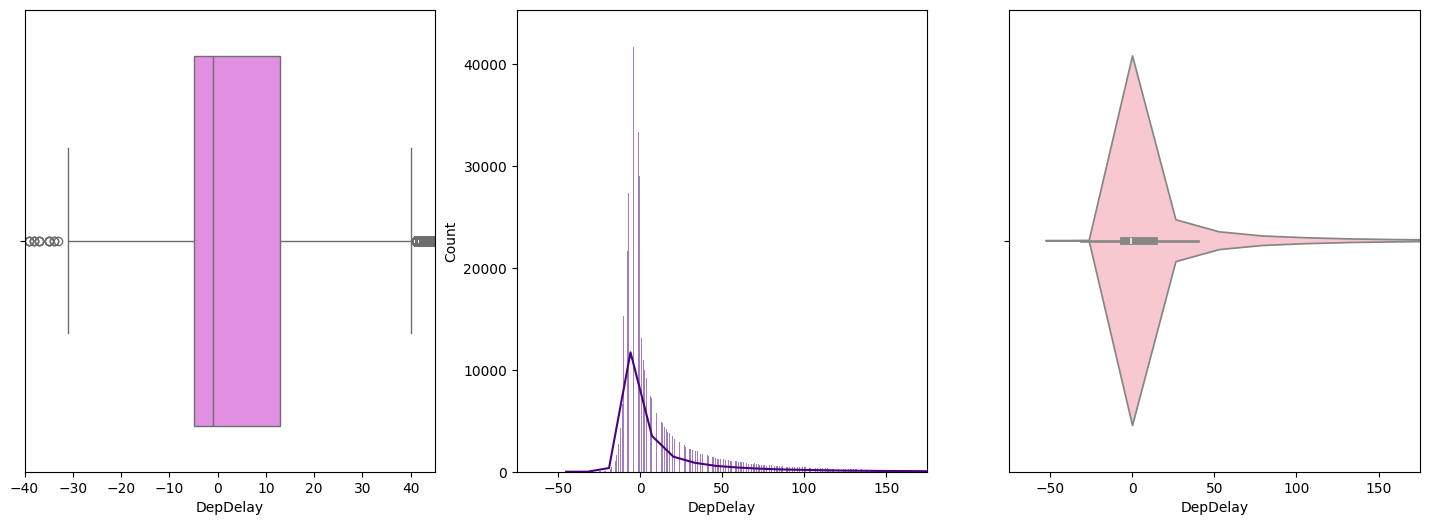

In [5]:
# Plot the distributions of DepDelay
f, axes = plt.subplots(1, 3, figsize=(18, 6))

boxplot = sb.boxplot(data=flights["DepDelay"], orient="h", ax=axes[0], color='violet')
boxplot.axes.set_xlim(left=-40, right=45)
histplot = sb.histplot(data=flights["DepDelay"], ax=axes[1], color='indigo', kde=True)
histplot.axes.set_xlim(left=-75, right=175)
violin = sb.violinplot(data=flights["DepDelay"], orient="h", ax=axes[2], color='pink')
violin.axes.set_xlim(left=-75, right=175)

### Summary Statistic

In [6]:
flights["DepDelay"].describe()

count    607657.000000
mean         14.805797
std          55.523967
min         -45.000000
25%          -5.000000
50%          -1.000000
75%          13.000000
max        2556.000000
Name: DepDelay, dtype: float64

<div class="alert alert-block alert-info">
From the summary statistic, we can see that on average, flights are delayed for 14.8 minutes.
</div>

<div class="alert alert-block alert-warning">
Highest delay is 2556 minutes = 42.6 hours ≈ 2 days. Such anomaly may indicate a data entry error rather than a real delay.
</div>

### Skewness

In [7]:
flights['DepDelay'].skew()

10.223758460665124

<div class="alert alert-block alert-danger">
Distribution of departure delays is heavily skewed to the right.
</div>

### Outliers

In [8]:
# Outlier count
q1 = flights["DepDelay"].quantile(.25)
q3 = flights["DepDelay"].quantile(.75)
iqr = q3-q1
count = 0
for i in flights["DepDelay"]:
    if i > (q3 + 1.5*iqr) or i < (q1 - 1.5*iqr):
        count += 1
print(count)

75234


<div class="alert alert-block alert-info">
There are 75234 outliers in our dataset.
</div>

### Removing Outlier

**Outliers can distort our exploratory analysis and machine learning models. Hence we are removing outliers to obtain more accurate statistics.**

In [9]:
flights_unfiltered = flights
flights = flights[(flights["DepDelay"] >= (q1 - 1.5*iqr)) & (flights["DepDelay"] <= (q3 + 1.5*iqr))]

In [10]:
print("Data dims : ", flights.shape)

Data dims :  (532423, 12)


## **Revisualisation of DepDelay**

(-40.0, 45.0)

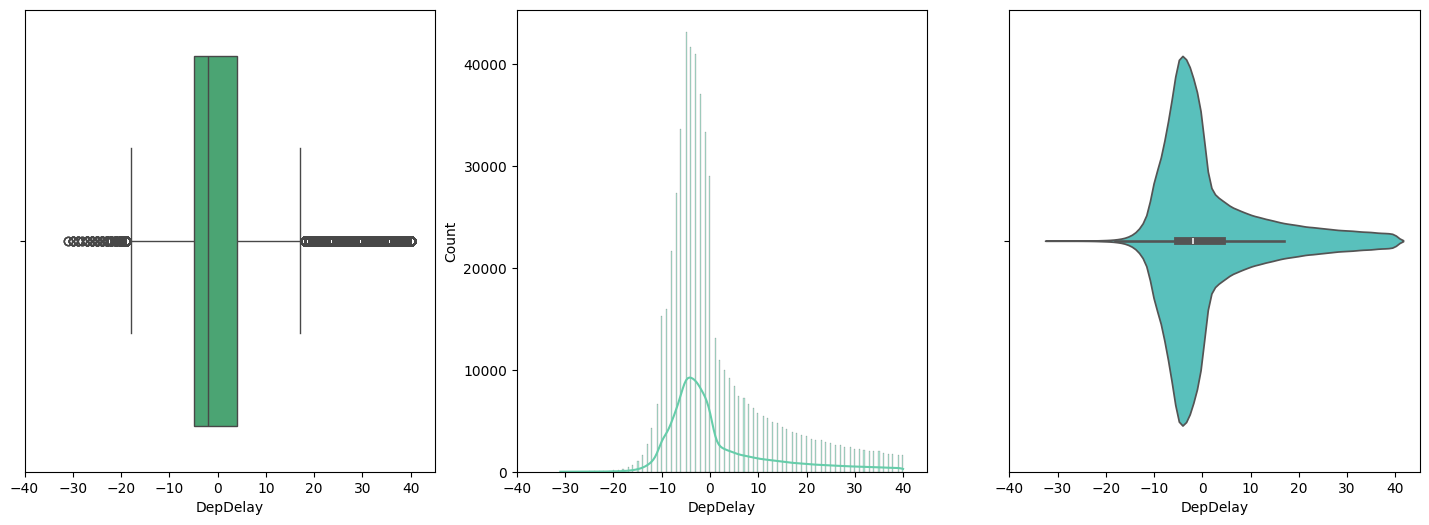

In [11]:
# Plot the distributions of DepDelay after removing outliers
f, axes = plt.subplots(1, 3, figsize=(18, 6))

boxplot = sb.boxplot(data=flights["DepDelay"], orient="h", ax=axes[0], color='mediumseagreen')
boxplot.axes.set_xlim(left=-40, right=45)
histplot = sb.histplot(data=flights["DepDelay"], ax=axes[1], color='mediumaquamarine', kde=True)
histplot.axes.set_xlim(left=-40, right=45)
violin = sb.violinplot(data=flights["DepDelay"], orient="h", ax=axes[2], color='mediumturquoise')
violin.axes.set_xlim(left=-40, right=45)

### Sumary Statistic + Skewness

In [12]:
flights["DepDelay"].describe()

count    532423.000000
mean          1.336653
std          11.083435
min         -31.000000
25%          -5.000000
50%          -2.000000
75%           4.000000
max          40.000000
Name: DepDelay, dtype: float64

In [13]:
flights['DepDelay'].skew()

1.534906184887098

<div class="alert alert-block alert-success">
Distribution of departure delays is significantly less skewed than before.
</div>

## **Visualisation: DepDelay15**
> **DepDel15** : Departure Delay Indicator, 15 Minutes or More (1=Yes)  

13.10% of all flights have delayed departures.


Text(0, 0.5, 'Percentage')

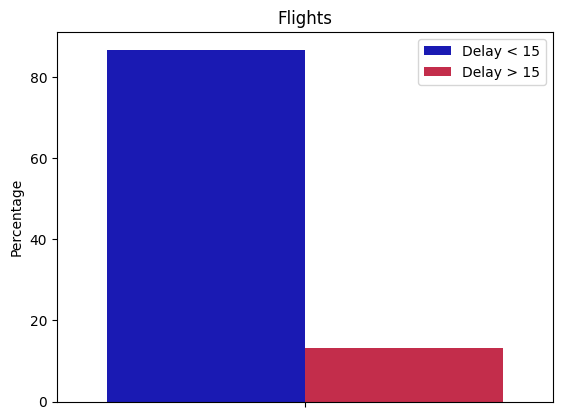

In [14]:
# Determine the percentage of delayed flights in dataset
# DepDelay15 -> Departure Delay Indicator, 15 Minutes or More (1=Yes)

# Split set of delayed flights
DepDel15T = flights[flights["DepDel15"] == 1]

# Calculating percentage of delay flights
delay_percentage = (len(DepDel15T) / len(flights)) * 100
print(f"{delay_percentage:.2f}% of all flights have delayed departures.")

colors = ["mediumblue", "crimson"]

# Plotting the barplot with custom colors and legend
ax = sb.barplot(hue="DepDel15", y="DepDel15", data=flights, palette=colors, estimator=lambda x: len(x)/len(flights) * 100, legend=True)
ax.set(title="Flights")

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Delay < 15', 'Delay > 15']
ax.legend(handles, labels)
ax.set_ylabel("Percentage")

<div class="alert alert-block alert-warning">  
<b>13.10%</b> of all flights have delayed departures of more than 15 minutes. 
</div>

## **Visualisation of Numeric Variables**

### Description of Numeric Variables

> **CRSDepTime** : CRS Departure Time (local time: hhmm)  
> **TaxiOut** : Taxi Out Time, in Minutes  
> **Distance** : 	Distance between airports (miles)        

In [15]:
numdf = pd.DataFrame(flights[['CRSDepTime','TaxiOut','Distance','DepDelay']])

In [16]:
numdf.head()

,CRSDepTime,TaxiOut,Distance,DepDelay
0,2017,18.0,1049.0,-5.0
1,2017,17.0,1049.0,19.0
2,2017,14.0,1049.0,-4.0
3,2017,17.0,1049.0,7.0
5,2017,34.0,1049.0,13.0


### Boxplot, Histogram, Violinplot of Numeric Variables

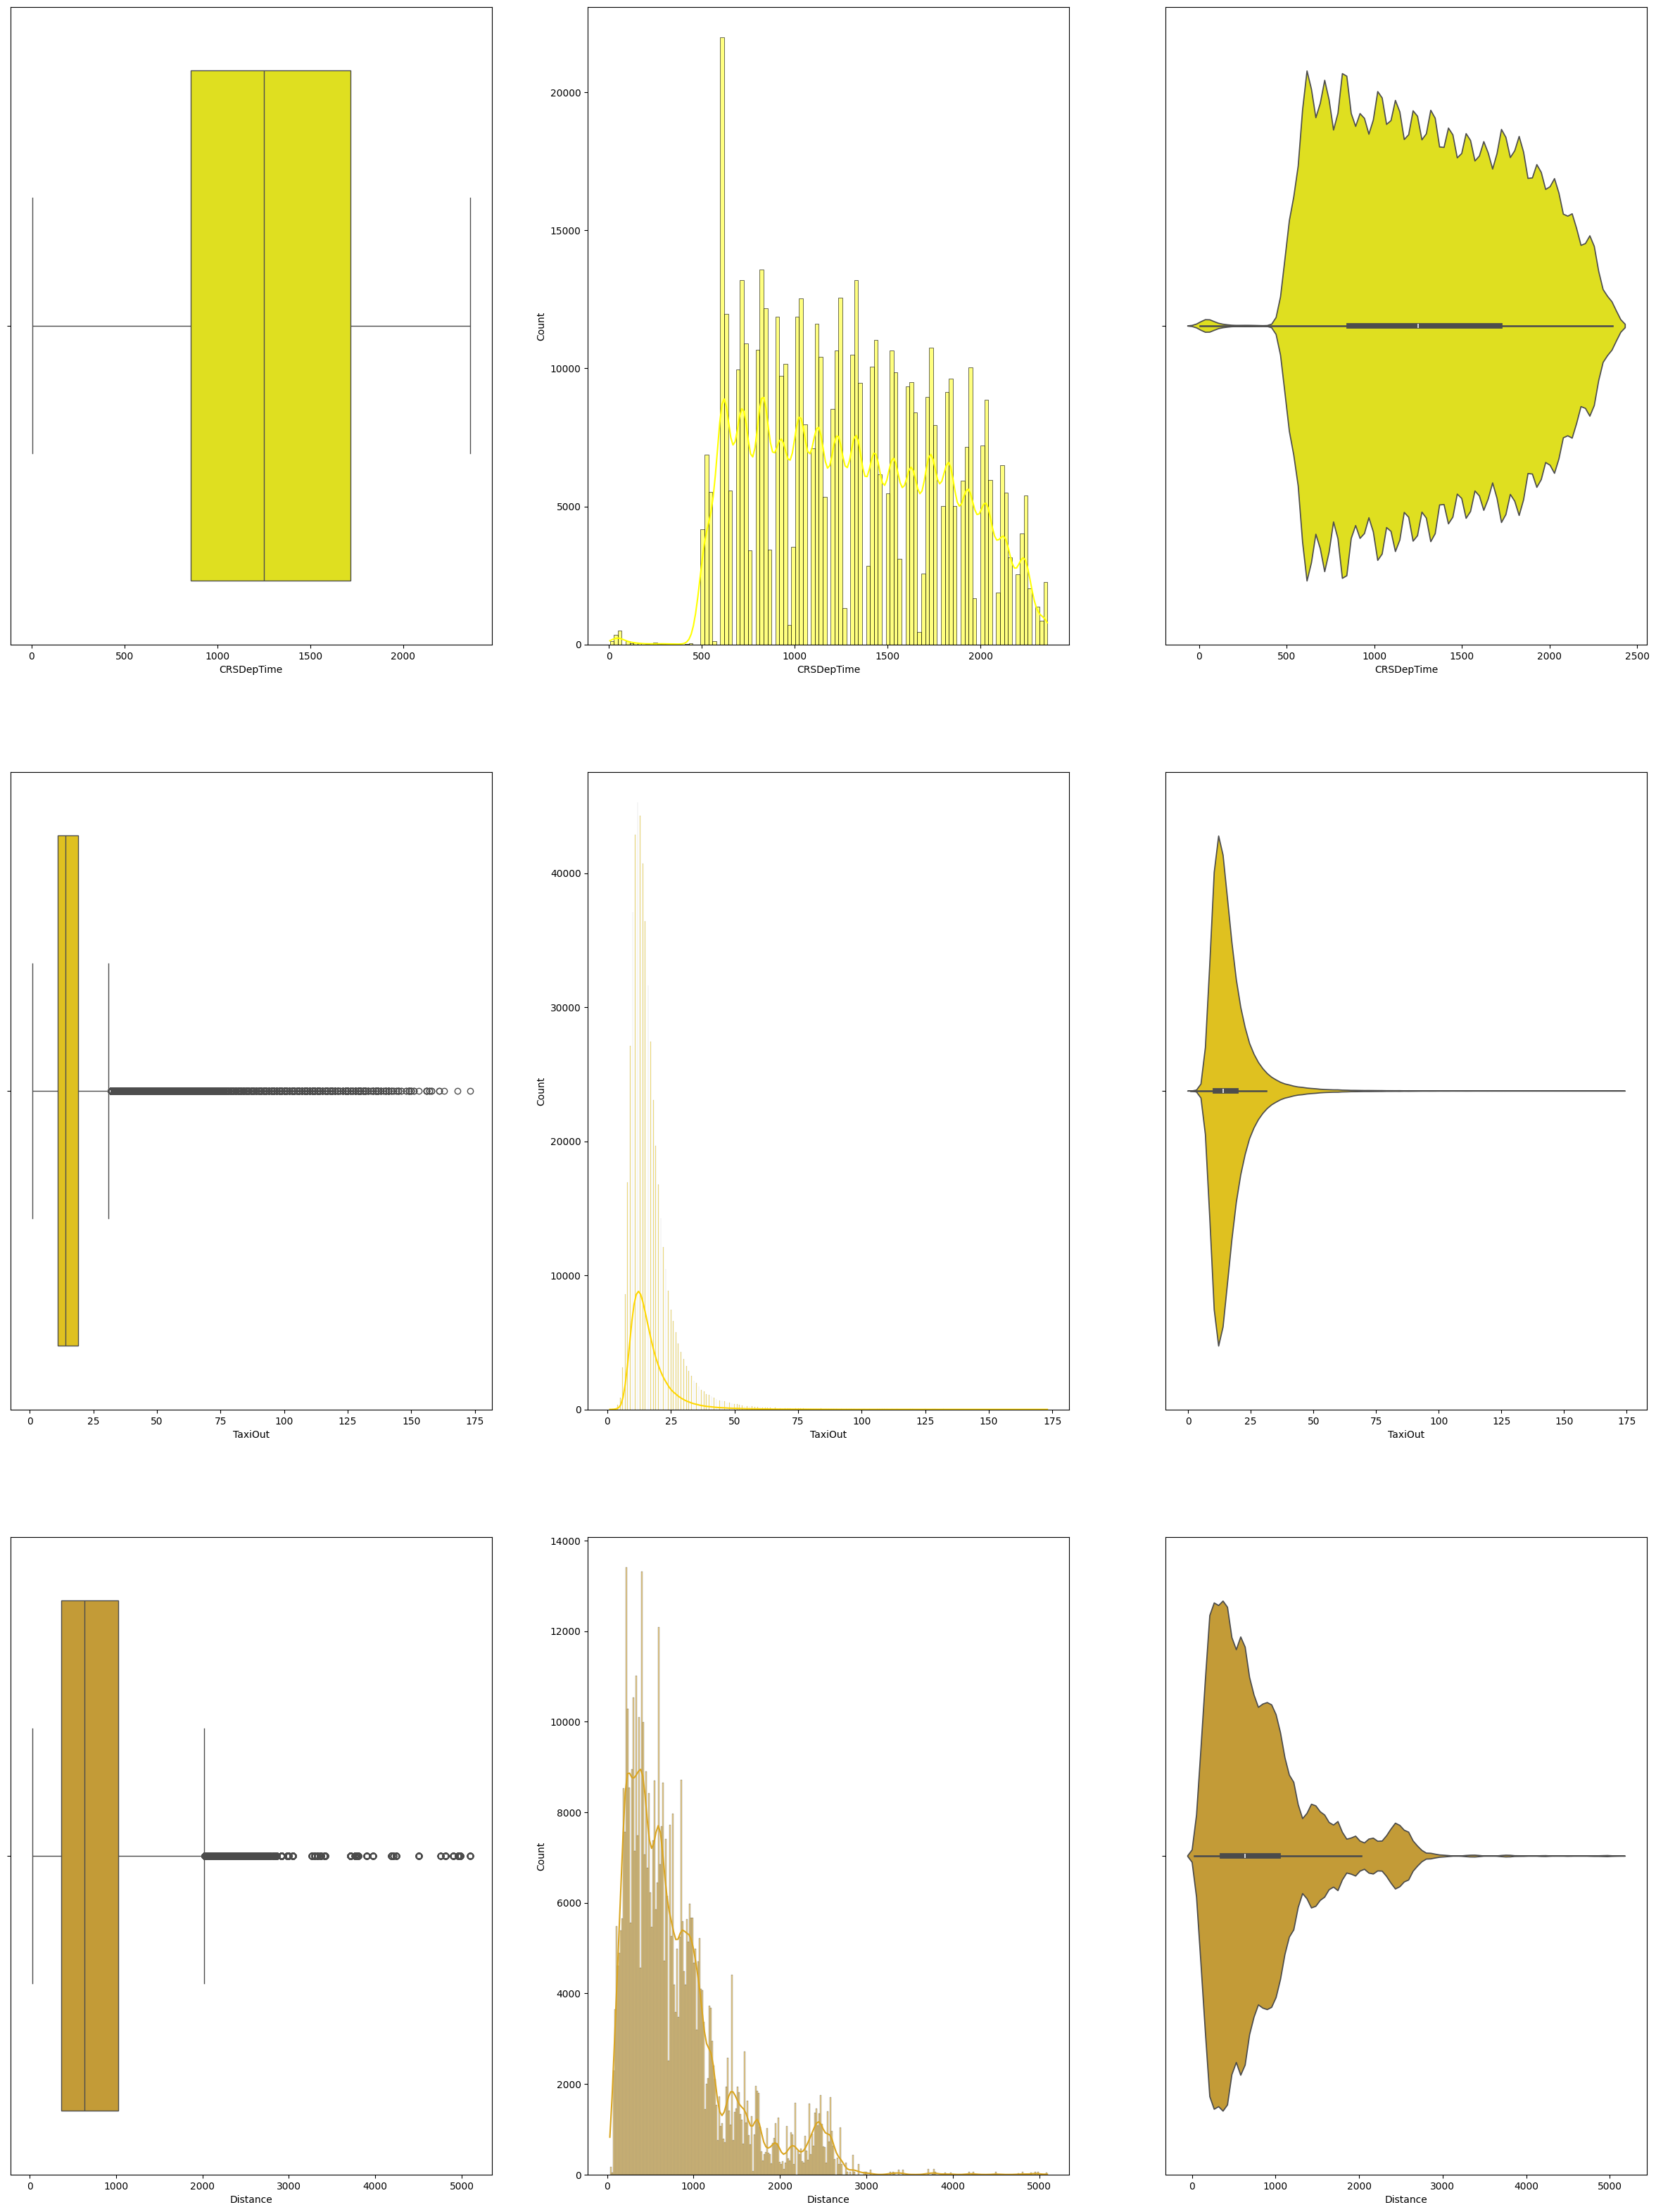

In [17]:
numvar = pd.DataFrame(numdf[['CRSDepTime','TaxiOut','Distance']])
f, axes = plt.subplots(3, 3, figsize=(30, 40))
colours = ['yellow','gold','goldenrod']

count = 0
for var in numvar:
    sb.boxplot(data = numvar[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = numvar[var], ax = axes[count,1], color=colours[count], kde=True)
    sb.violinplot(data = numvar[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

### Pairplot of Numberic Variables

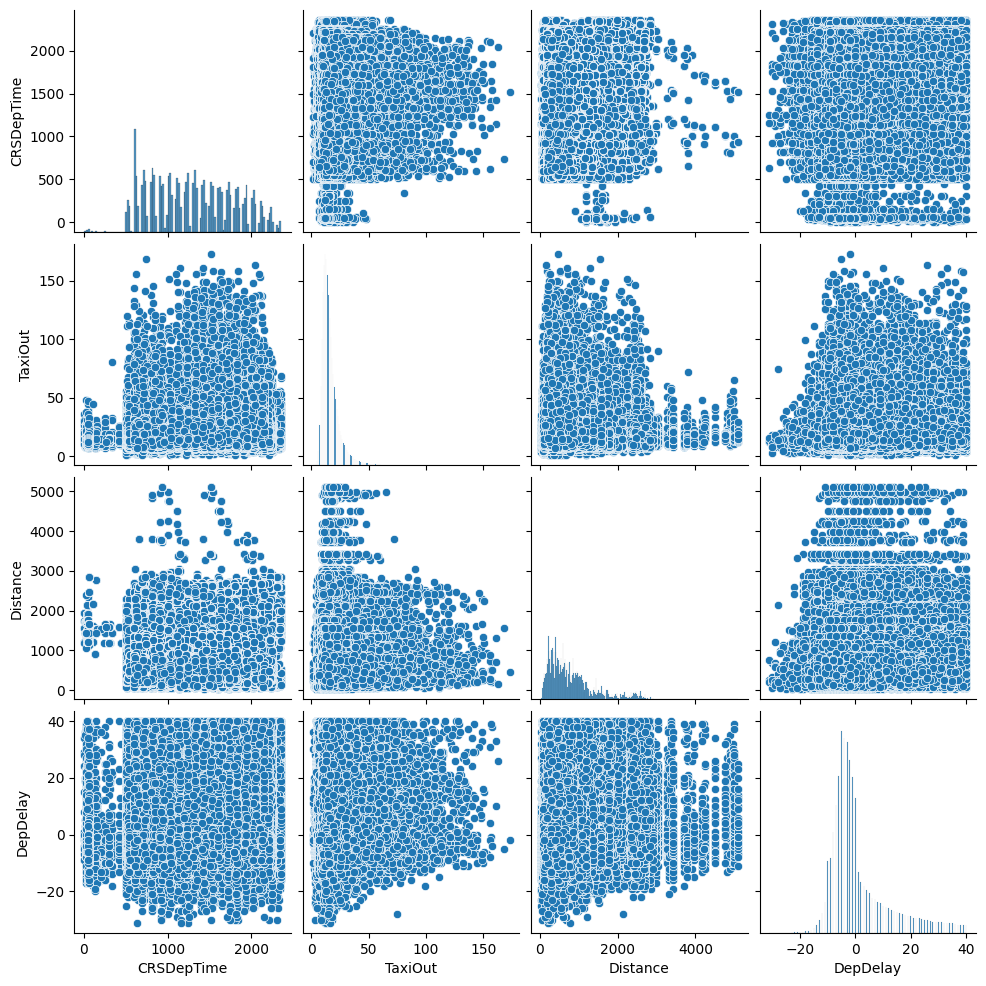

In [18]:
sb.pairplot(data=numdf)

<div class="alert alert-block alert-warning">  
From the pairplot, we can visualise that there are no strong linear relationship between the numeric variables and DepDelay.
</div>

<div class="alert alert-block alert-info">  
<b>Interesting Data from Pairplot</b> [row][column]<br />

1. [1][1] We can deduce 0500 to 2300 is peak hours with high volumes of departures.<br />
   We are infering that the substantial traffic volume on runways during the peak hours may result in a departure delay.

2. [2][1] From the plot of CRSDepTime against TaxiOut, the visualisation aligns with our earlier assertion,<br />
   where flights are more likely to experience longer taxi out <u>possibly</u> due to substantial traffic volume.

3. [4][2] From the plot of TaxiOut against DepDelay, it is showing signs of a linear relation, indicating a plausible correlation between these variables.

### **Correlation Matrix Heatmap of Numeric Variables**

<Axes: >

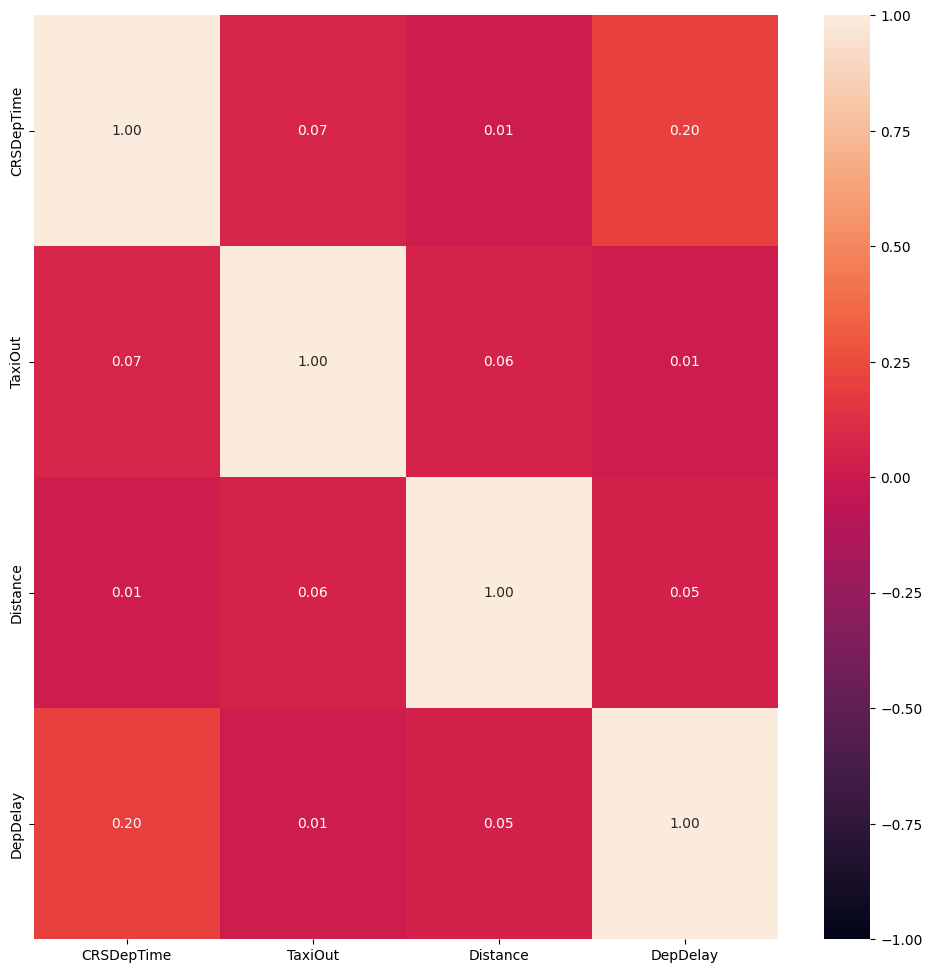

In [19]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(numdf.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<div class="alert alert-block alert-danger">  
From the correlation matrix, it rebutes our initial assumption that TaxiOut and Distance has a negative relation with DepDelay.<br />
Furthermore, we can see that the variables do not have a significant correlation with each other.<br />
Amongst the variables, CRSDepTime has the highest correlation of 0.2 with DepDelay.<br />
<b>Hence, in general, our variables do not have a significant linear relation with DepDelay.</b>
</div>

**CRSDepTime** -> **Hour**

C:\Users\yipip\AppData\Local\Temp\ipykernel_4824\2843979177.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['Hour'] = flights.apply(get_hour, axis=1)
C:\Users\yipip\AppData\Local\Temp\ipykernel_4824\2843979177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DepDel15T['Hour'] = flights.apply(get_hour, axis=1)


<BarContainer object of 24 artists>

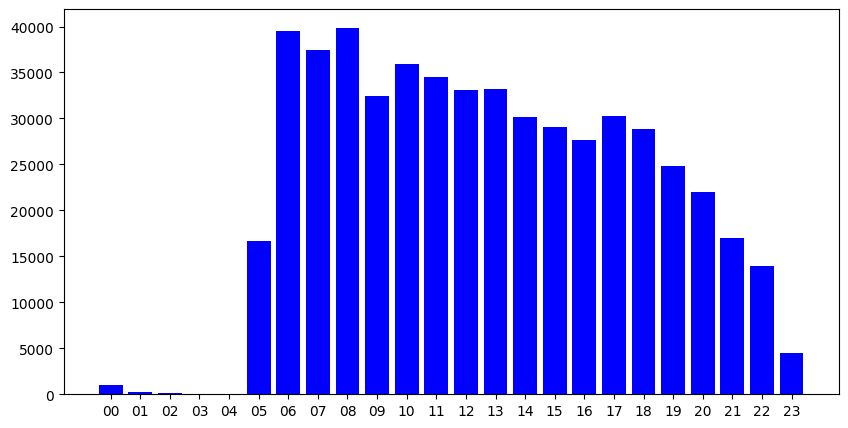

In [20]:
# Extracting Exact Allocated Departure Time into Hours (Numerical to Categorical)
def get_hour(row):
    time = str(row["CRSDepTime"]).zfill(4)

    return time[0:2]

flights['Hour'] = flights.apply(get_hour, axis=1)
DepDel15T['Hour'] = flights.apply(get_hour, axis=1)

# Obtaining Frequency of flights per hour
frequency_of_hours = flights['Hour'].value_counts()
values = sorted([(key, val) for key, val in frequency_of_hours.items()])
hours = []
frequencies = []
for key, val in values:
   hours.append(key)
   frequencies.append(val)

plt.figure(figsize=(10,5))
plt.bar(hours, frequencies, label = 'Number of flights', color='b')

<div class="alert alert-block alert-success">
After categorising CRSDepTime into their respective 24 hours timestamp, we came to a conclusion that from 2300 to 0500, there is a significant drop in scheduled flights.<br /> To ease visualization in the midst of complexity, we shall approach CRSDepTime <b><u>categorically</u></b> instead for better interpretation of data. </div>

## **Visualisation of Categorical Variables**

### Description of the Categorical Variables

> **DayOfMonth** : Day of Month  
> **DayOfWeek** : Day of Week   
> **Operating_Airline** :  Unique Carrier Code  
> **Origin** : Origin Airport  
> **Dest** : Destination Airport   
> **DistanceGroup** : Distance Intervals, every 250 Miles, for Flight Segment  
> **Hour**: CRS Departure Hour (local hour: hh) *Initially CRSDepTime

In [21]:
catdf = pd.DataFrame(flights[['DayOfMonth','DayOfWeek','Operating_Airline','Origin','Dest','DistanceGroup','Hour','DepDelay','DepDel15','DepDelayMinutes']])

In [22]:
catdf.head()

,DayOfMonth,DayOfWeek,Operating_Airline,Origin,Dest,DistanceGroup,Hour,DepDelay,DepDel15,DepDelayMinutes
0,19,2,OH,DCA,TUL,5,20,-5.0,0.0,0.0
1,20,3,OH,DCA,TUL,5,20,19.0,1.0,19.0
2,21,4,OH,DCA,TUL,5,20,-4.0,0.0,0.0
3,24,7,OH,DCA,TUL,5,20,7.0,0.0,7.0
5,26,2,OH,DCA,TUL,5,20,13.0,0.0,13.0


In [23]:
print("Data dims : ", catdf.shape)

Data dims :  (532423, 10)


### Boxplot of Categorical Variables

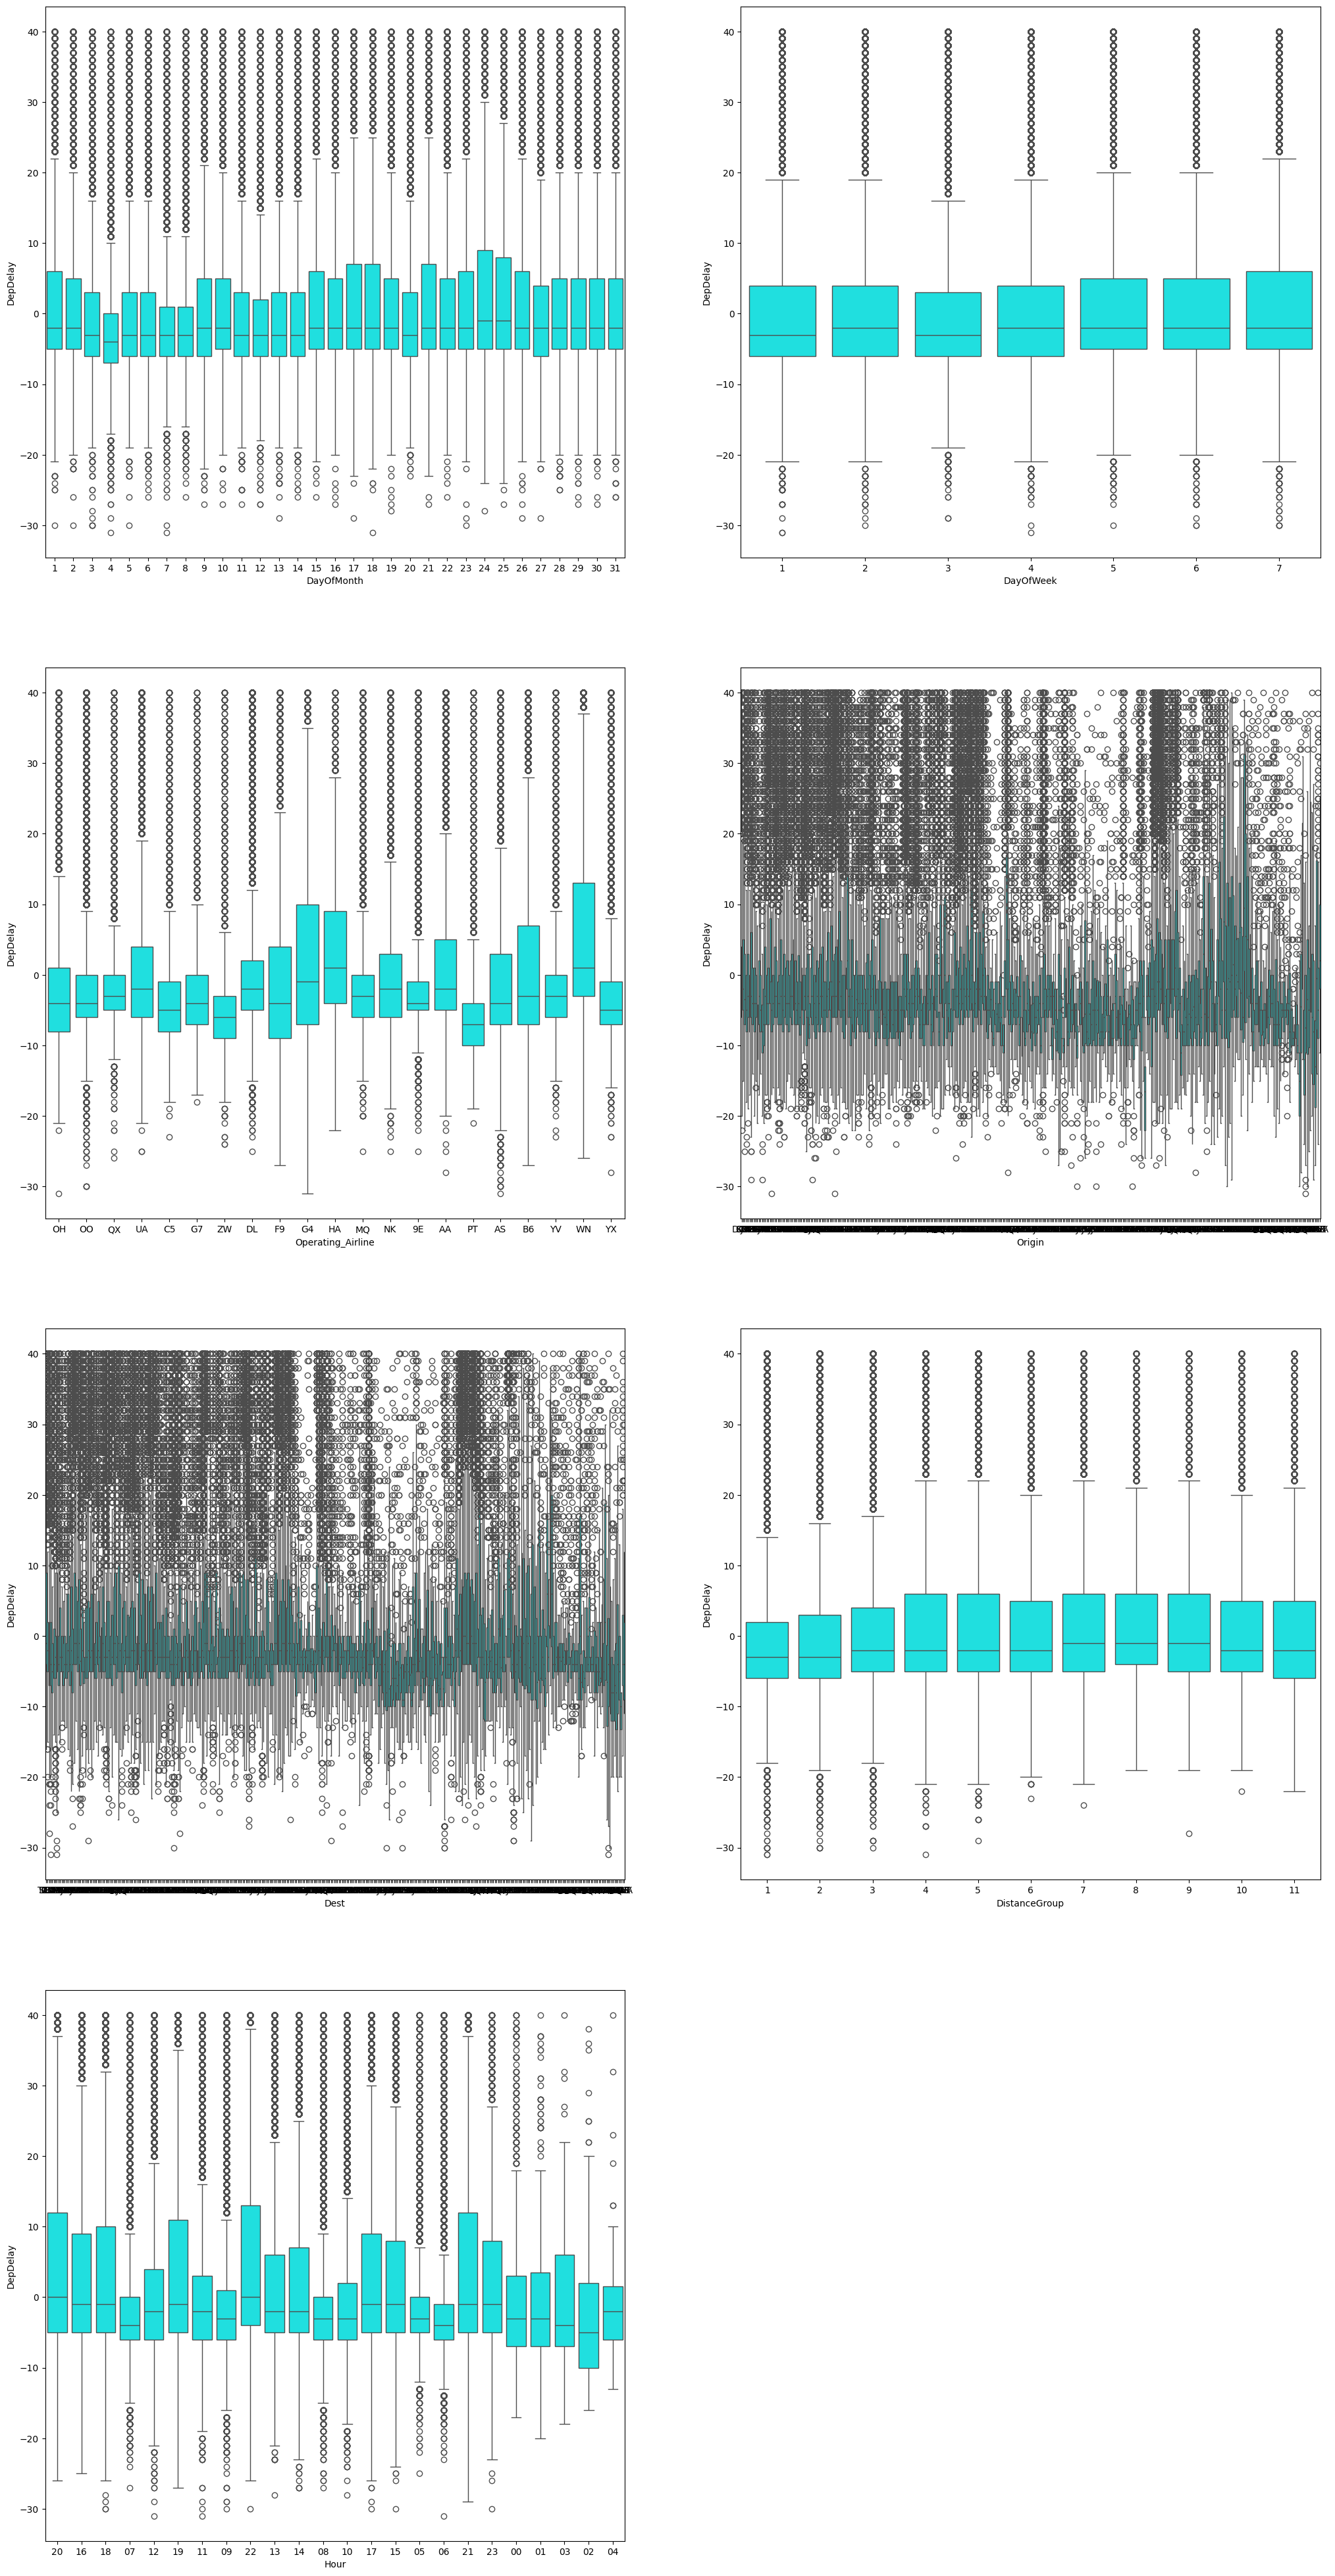

In [24]:
f, axes = plt.subplots(4, 2, figsize=(25, 50))

sb.boxplot(data=catdf, x='DayOfMonth', y='DepDelay', ax=axes[0, 0], color='aqua')
sb.boxplot(data=catdf, x='DayOfWeek', y='DepDelay', ax=axes[0, 1], color='aqua')
sb.boxplot(data=catdf, x='Operating_Airline', y='DepDelay', ax=axes[1, 0], color='aqua')
sb.boxplot(data=catdf, x='Origin', y='DepDelay', ax=axes[1, 1], color='aqua')
sb.boxplot(data=catdf, x='Dest', y='DepDelay', ax=axes[2, 0], color='aqua')
sb.boxplot(data=catdf, x='DistanceGroup', y='DepDelay', ax=axes[2, 1], color='aqua')
sb.boxplot(data=catdf, x='Hour', y='DepDelay', ax=axes[3, 0], color='aqua')
f.delaxes(axes[3, 1])

## **Chi-square Test**

For each categorical variables:  
> Null Hypothesis (H0): DepDel15 is **independent** of (Category).  
> Alternate Hypothesis (H1): DepDel15 is **dependent** on (Category).  

**P-value > 0.05:** accept H0  
**P-value < 0.05:** reject H0 and accept H1

In [25]:
from scipy.stats import chi2_contingency

### Chi-square Function

In [26]:
# Create a Contingency Table
def chi(Category):
    chi = pd.crosstab(catdf['DepDel15'], catdf[Category], margins=True)
    print(chi)
    return chi

# Apply chi2_contingency() to Obtain P-value
def chisqt(chi):
    value = np.array([chi.iloc[0][0:5].values, chi.iloc[1][0:5].values])
    print("P-value:", chi2_contingency(value)[1])

### **DayOfMonth**

In [27]:
chi1 = chi("DayOfMonth")

DayOfMonth      1      2      3      4      5      6      7      8      9  \
DepDel15                                                                    
0.0         14817  13638  15369  17222  15206  15194  16802  16446  13672   
1.0          2557   2104   1887   1289   2033   2076   1850   1840   2194   
All         17374  15742  17256  18511  17239  17270  18652  18286  15866   

DayOfMonth     10  ...     23     24     25     26     27     28     29  \
DepDel15           ...                                                    
0.0         15646  ...  12003  12951  12874  13571  15154  15406  15491   
1.0          2462  ...   2052   2923   2567   2518   2205   2378   2591   
All         18108  ...  14055  15874  15441  16089  17359  17784  18082   

DayOfMonth     30     31     All  
DepDel15                          
0.0         14136  15111  462690  
1.0          2110   2348   69733  
All         16246  17459  532423  

[3 rows x 32 columns]


In [28]:
chisqt(chi1)

P-value: 1.9245307466312494e-131


### **DayOfWeek**

In [29]:
chi2 = chi("DayOfWeek")

DayOfWeek      1      2      3      4      5      6      7     All
DepDel15                                                          
0.0        60843  59055  61786  62792  77390  67031  73793  462690
1.0         8723   8693   8223   9045  12114  10543  12392   69733
All        69566  67748  70009  71837  89504  77574  86185  532423


In [30]:
chisqt(chi2)

P-value: 2.0889824637626115e-24


### **Operating_Airline**

In [31]:
chi3 = chi("Operating_Airline")

Operating_Airline     9E     AA     AS     B6    C5     DL     F9     G4  \
DepDel15                                                                   
0.0                15630  52859  17004  15314  5879  62095   9572   8174   
1.0                 1408   9041   1999   2972   517   7753   1559   1937   
All                17038  61900  19003  18286  6396  69848  11131  10111   

Operating_Airline    G7    HA  ...     OH     OO    PT    QX     UA     WN  \
DepDel15                       ...                                           
0.0                3414  5527  ...  14434  54733  6150  7482  42271  76272   
1.0                 313   960  ...   1740   4404   364   594   5470  22035   
All                3727  6487  ...  16174  59137  6514  8076  47741  98307   

Operating_Airline    YV     YX    ZW     All  
DepDel15                                      
0.0                7343  20993  4160  462690  
1.0                 798   1828   241   69733  
All                8141  22821  4401  53

In [32]:
chisqt(chi3)

P-value: 1.993815996880628e-191


### **Origin**

In [33]:
chi4 = chi("Origin")

Origin    ABE  ABI   ABQ  ABR  ABY  ACK  ACT  ACV  ACY  ADK  ...  VLD  VPS  \
DepDel15                                                     ...             
0.0       382  148  1390   54   62  403  118  159  291    5  ...   73  768   
1.0        23    5   191    4    6   44   11    8   29    3  ...    8  124   
All       405  153  1581   58   68  447  129  167  320    8  ...   81  892   

Origin    WRG  WYS  XNA  XWA  YAK  YKM  YUM     All  
DepDel15                                             
0.0        52   57  878  123   54   59  113  462690  
1.0         9    3   66    4    4    1    4   69733  
All        61   60  944  127   58   60  117  532423  

[3 rows x 369 columns]


In [34]:
chisqt(chi4)

P-value: 7.380454636442418e-05


### **Dest**

In [35]:
chi5 = chi("Dest")

Dest      ABE  ABI   ABQ  ABR  ABY  ACK  ACT  ACV  ACY  ADK  ...  VLD  VPS  \
DepDel15                                                     ...             
0.0       346  139  1244   56   55  440  111  155  276    7  ...   67  710   
1.0        56   16   281    2   10   34   20   14   32    1  ...   14  156   
All       402  155  1525   58   65  474  131  169  308    8  ...   81  866   

Dest      WRG  WYS  XNA  XWA  YAK  YKM  YUM     All  
DepDel15                                             
0.0        55   52  881  123   54   58  106  462690  
1.0         4    7   69    9    7    1    4   69733  
All        59   59  950  132   61   59  110  532423  

[3 rows x 369 columns]


In [36]:
chisqt(chi5)

P-value: 0.0015403211819921424


### **DistanceGroup**

In [37]:
chi6 = chi("DistanceGroup")

DistanceGroup      1       2       3      4      5      6      7      8     9  \
DepDel15                                                                        
0.0            66070  113502   92196  69554  45149  20041  18188   8981  6786   
1.0             7901   16028   13785  12024   7717   3239   3120   1517  1126   
All            73971  129530  105981  81578  52866  23280  21308  10498  7912   

DistanceGroup     10     11     All  
DepDel15                             
0.0            12168  10055  462690  
1.0             1820   1456   69733  
All            13988  11511  532423  


In [38]:
chisqt(chi6)

P-value: 7.272107547727438e-158


### **Hour**

In [39]:
chi7 = chi("Hour")

Hour       00   01  02  03  04     05     06     07     08     09  ...     15  \
DepDel15                                                           ...          
0.0       861  217  79  61  51  15943  37800  35312  37030  29594  ...  24234   
1.0       123   34  10  12   4    741   1733   2160   2852   2883  ...   4843   
All       984  251  89  73  55  16684  39533  37472  39882  32477  ...  29077   

Hour         16     17     18     19     20     21     22    23     All  
DepDel15                                                                 
0.0       22536  24691  23307  19594  17183  13366  10836  3764  462690  
1.0        5157   5528   5498   5232   4837   3633   3151   712   69733  
All       27693  30219  28805  24826  22020  16999  13987  4476  532423  

[3 rows x 25 columns]


In [40]:
chisqt(chi7)

P-value: 0.5993481487865715


<div class="alert alert-block alert-warning">  
P-value returned 0.599 > 0.5  
DepDel15 is <b>independent</b> of Hour
</div>

## **Percentage Analysis**
For our categorical analysis, we will be looking at the percentage of delays for each catergory with reference to DepDelay15.<br />
e.g. (DayOfMonth: Percentage of delay for <b>each</b> month)

### Percentage Function

In [41]:
def find_percentage(Dataset, Category):
    # Flight counts per Category
    Cat = Dataset[Category].value_counts()
    
    # Delayed flight counts per Category
    Del_Cat = DepDel15T[Category].value_counts()

    # Compiling counts
    Cat2 = Cat.reset_index()
    Del_Cat2 = Del_Cat.reset_index()
    Cat2.columns = [Category, 'Flights']
    Del_Cat2.columns = [Category, 'DepDelay15']

    # Calculating Percentage of Delay
    Percentage = pd.merge(Cat2, Del_Cat2, on=Category, how='outer')
    Percentage['Percentage'] = (Percentage['DepDelay15'] / Percentage['Flights']) * 100
    Percentage = Percentage.sort_values(by='Percentage', ascending=False)
    
    # Fill NaN collumns with 0
    Percentage.fillna(0, inplace = True)
    return Percentage

### **DayOfMonth**

In [42]:
Percentage = find_percentage(catdf, "DayOfMonth")
print(Percentage.to_string(index=False))

 DayOfMonth  Flights  DepDelay15  Percentage
         24    15874        2923   18.413758
         25    15441        2567   16.624571
         17    17488        2772   15.850869
         26    16089        2518   15.650444
         18    16715        2597   15.536943
         21    17197        2641   15.357330
          1    17374        2557   14.717394
         15    17752        2612   14.713835
         23    14055        2052   14.599787
         29    18082        2591   14.329167
         19    17073        2403   14.074855
         22    18010        2514   13.958912
          9    15866        2194   13.828312
         10    18108        2462   13.596201
         31    17459        2348   13.448651
         28    17784        2378   13.371570
          2    15742        2104   13.365519
         16    15665        2083   13.297159
         30    16246        2110   12.987812
         27    17359        2205   12.702345
          6    17270        2076   12.020845
         1

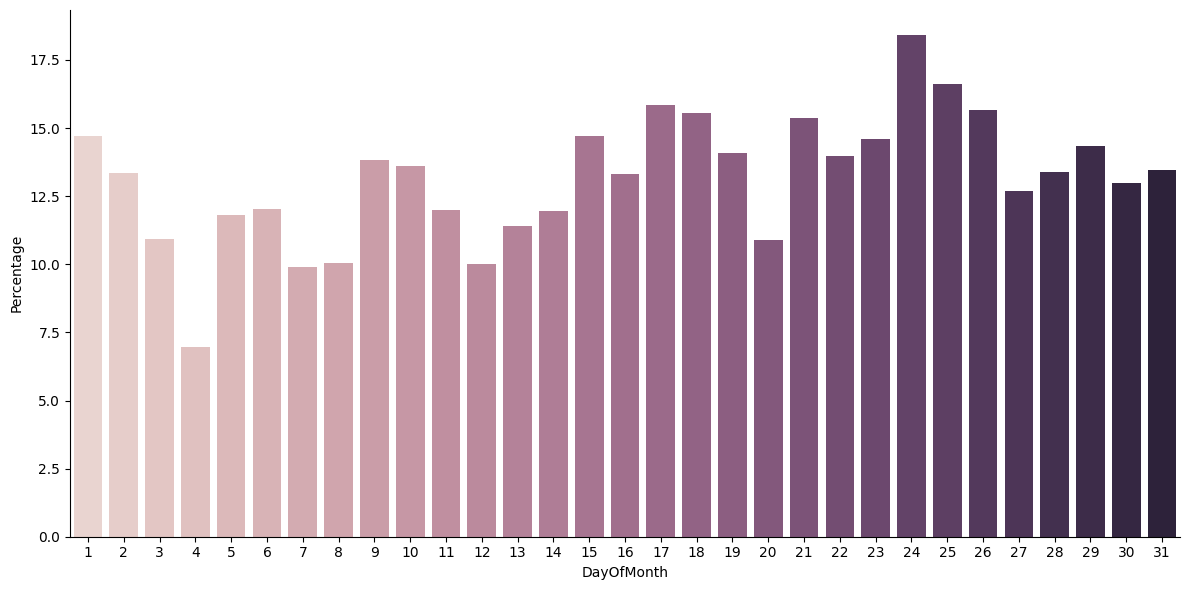

In [43]:
sb.catplot(x='DayOfMonth', y='Percentage', kind='bar', data=Percentage, height=6, aspect=2, hue="DayOfMonth", legend=False)

In [44]:
Percentage["Percentage"].describe()

count    31.000000
mean     13.173992
std       2.322583
min       6.963427
25%      11.873222
50%      13.371570
75%      14.656811
max      18.413758
Name: Percentage, dtype: float64

### Observations

<div class="alert alert-block alert-info">  
There doesn't seem to be a clear trend in the percentage of delayed flights as the month progresses. 
</div>

### **DayOfWeek**

In [45]:
Percentage2 = find_percentage(catdf, "DayOfWeek")
print(Percentage2.to_string(index=False))

 DayOfWeek  Flights  DepDelay15  Percentage
         7    86185       12392   14.378372
         6    77574       10543   13.590894
         5    89504       12114   13.534591
         2    67748        8693   12.831375
         4    71837        9045   12.591005
         1    69566        8723   12.539171
         3    70009        8223   11.745633


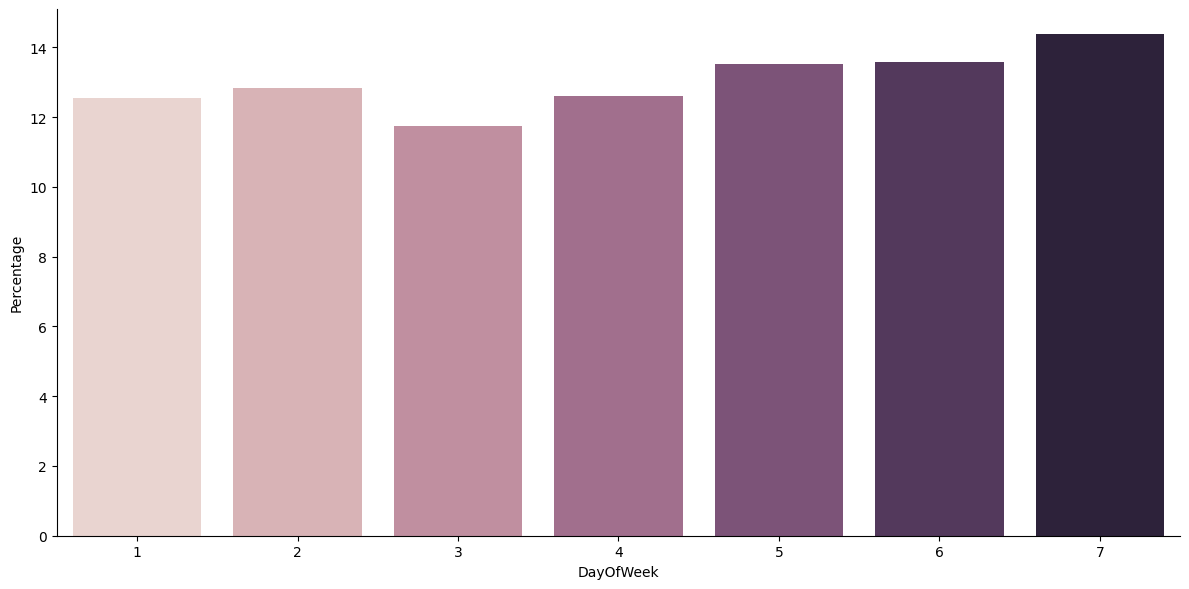

In [46]:
sb.catplot(x='DayOfWeek', y='Percentage', kind='bar', data=Percentage2, height=6, aspect=2, hue="DayOfWeek", legend=False)

In [47]:
print(Percentage2["Percentage"].describe())

count     7.000000
mean     13.030149
std       0.866987
min      11.745633
25%      12.565088
50%      12.831375
75%      13.562742
max      14.378372
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
There is a relatively even distribution for DayOfWeek, with std = 0.866 (3 s.f)
</div>

<div class="alert alert-block alert-info">  
The weekends has slightly more chances of delay.
</div>

### **Operating_Airline**

In [48]:
Percentage3 = find_percentage(catdf, "Operating_Airline")
print(Percentage3.to_string(index=False))

Operating_Airline  Flights  DepDelay15  Percentage
               WN    98307       22035   22.414477
               G4    10111        1937   19.157353
               B6    18286        2972   16.252871
               HA     6487         960   14.798828
               AA    61900        9041   14.605816
               F9    11131        1559   14.005929
               NK    17254        2092   12.124725
               UA    47741        5470   11.457657
               DL    69848        7753   11.099817
               OH    16174        1740   10.758007
               AS    19003        1999   10.519392
               YV     8141         798    9.802236
               MQ    19930        1708    8.569995
               G7     3727         313    8.398175
               9E    17038        1408    8.263881
               C5     6396         517    8.083177
               YX    22821        1828    8.010166
               OO    59137        4404    7.447114
               QX     8076     

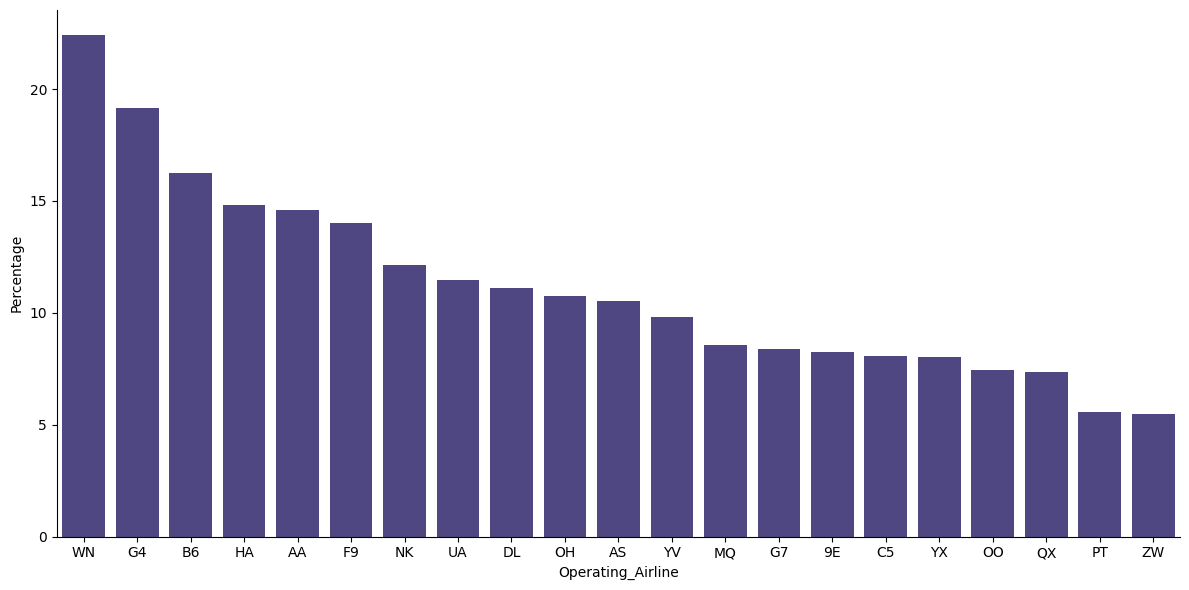

In [49]:
sb.catplot(x='Operating_Airline', y='Percentage', kind='bar', data=Percentage3, height=6, aspect=2, color="darkslateblue", legend=False)

In [50]:
print(Percentage3["Percentage"].describe())

count    21.000000
mean     11.151845
std       4.398515
min       5.476028
25%       8.083177
50%      10.519392
75%      14.005929
max      22.414477
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
Airlines like Southwest (WN), Allegiant Air (G4), and JetBlue Airways (B6) have relatively higher percentages of delayed flights compared to others. <br />This suggests that they might experience more delays in their operations.
</div>

### **Origin**

In [51]:
Percentage4 = find_percentage(catdf, "Origin")
Percentage4.head()

,Origin,Flights,DepDelay15,Percentage
255,OWB,6,3.0,50.000000
52,BRW,19,9.0,47.368421
13,AKN,28,13.0,46.428571
9,ADK,8,3.0,37.500000
311,SCK,28,10.0,35.714286


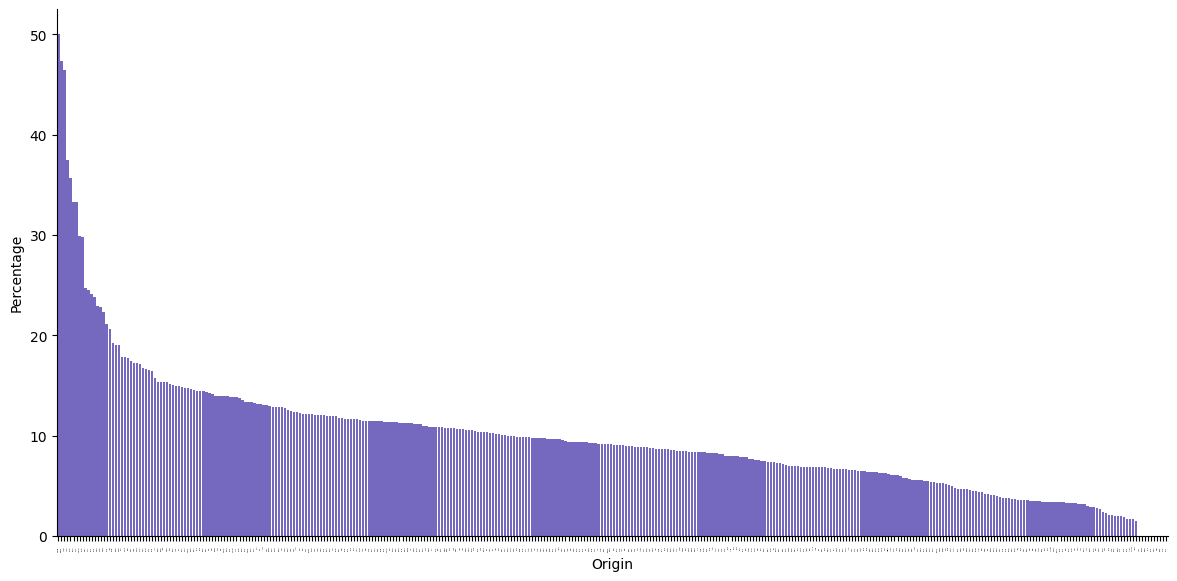

In [52]:
a = sb.catplot(x='Origin', y='Percentage', kind='bar', data=Percentage4, height=6, aspect=2, color="slateblue", legend=False)
a.set_xticklabels(rotation=90, fontsize=1.5)

In [53]:
print(Percentage4["Percentage"].describe())

count    368.000000
mean       9.792117
std        6.520262
min        0.000000
25%        6.176630
50%        9.128788
75%       11.931014
max       50.000000
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
There are several airports that have 0% of their flights delayed for more than 15 minutes.
</div>

### **Dest**

In [54]:
Percentage5 = find_percentage(catdf, "Dest")
Percentage5.head()

,Dest,Flights,DepDelay15,Percentage
328,SMX,6,4.0,66.666667
273,PPG,7,3.0,42.857143
255,OWB,6,2.0,33.333333
52,BRW,24,8.0,33.333333
277,PSE,71,21.0,29.577465


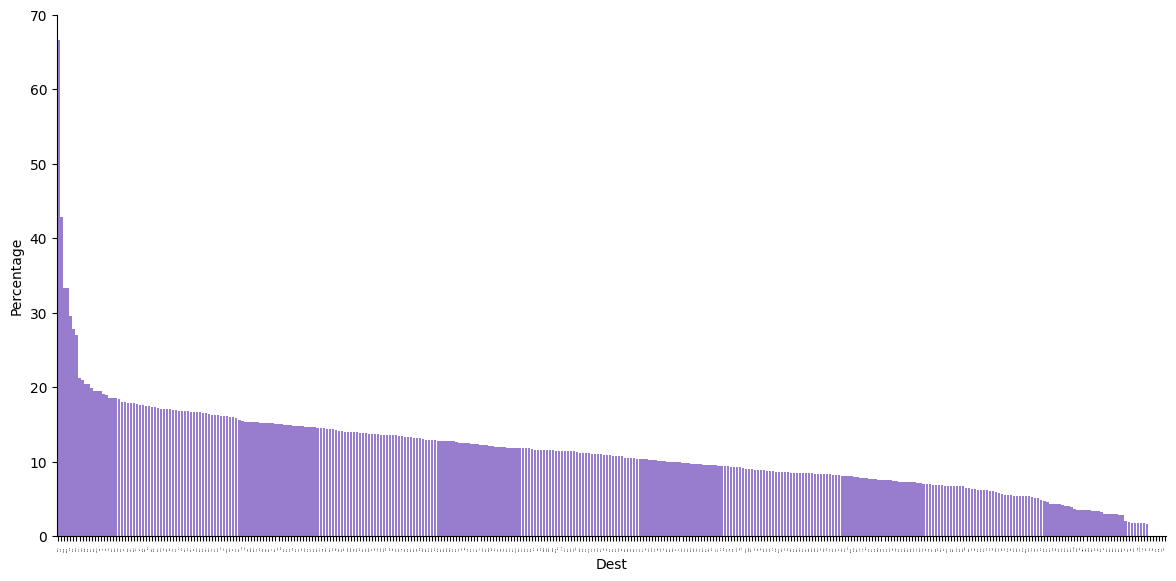

In [55]:
b = sb.catplot(x='Dest', y='Percentage', kind='bar', data=Percentage5, height=6, aspect=2, color="mediumpurple", legend=False)
b.set_xticklabels(rotation=90, fontsize=1.5)

In [56]:
print(Percentage5["Percentage"].describe())

count    368.000000
mean      11.116062
std        6.088984
min        0.000000
25%        7.508803
50%       10.827092
75%       14.323210
max       66.666667
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
Flights towards Santa Maria Public Airport (SMX) have the highest chance of delayed departure.<br />
Although there are only a total of 6 flights towards SMX throughout the month.
</div>

<div class="alert alert-block alert-info">  
There are several destination airports that have 0% of their flights delayed towards them for more than 15 minutes.
</div>

### **DistanceGroup**

In [57]:
Percentage6 = find_percentage(catdf, "DistanceGroup")
print(Percentage6.to_string(index=False))

 DistanceGroup  Flights  DepDelay15  Percentage
             4    81578       12024   14.739268
             7    21308        3120   14.642388
             5    52866        7717   14.597284
             8    10498        1517   14.450371
             9     7912        1126   14.231547
             6    23280        3239   13.913230
            10    13988        1820   13.011152
             3   105981       13785   13.007048
            11    11511        1456   12.648771
             2   129530       16028   12.373967
             1    73971        7901   10.681213


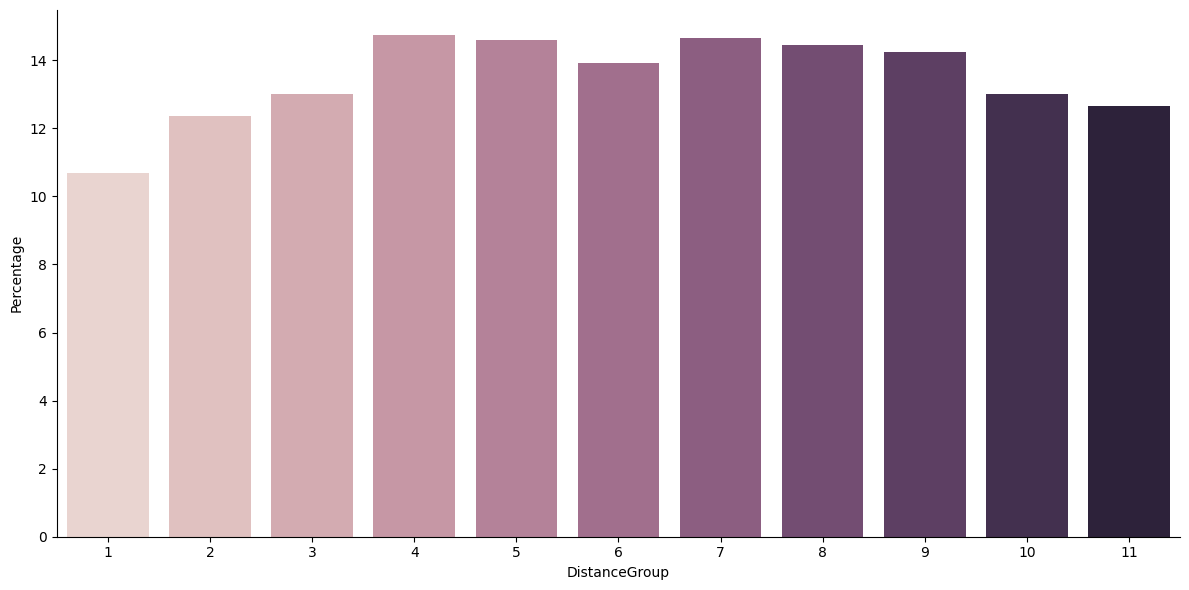

In [58]:
sb.catplot(x='DistanceGroup', y='Percentage', kind='bar', data=Percentage6, height=6, aspect=2, hue="DistanceGroup", legend=False)

In [59]:
print(Percentage6["Percentage"].describe())

count    11.000000
mean     13.481476
std       1.267687
min      10.681213
25%      12.827910
50%      13.913230
75%      14.523828
max      14.739268
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
Also a rather even distribution with std = 1.26 (3 s.f)
</div>

### **Hour**

In [60]:
Percentage7 = find_percentage(catdf, "Hour")

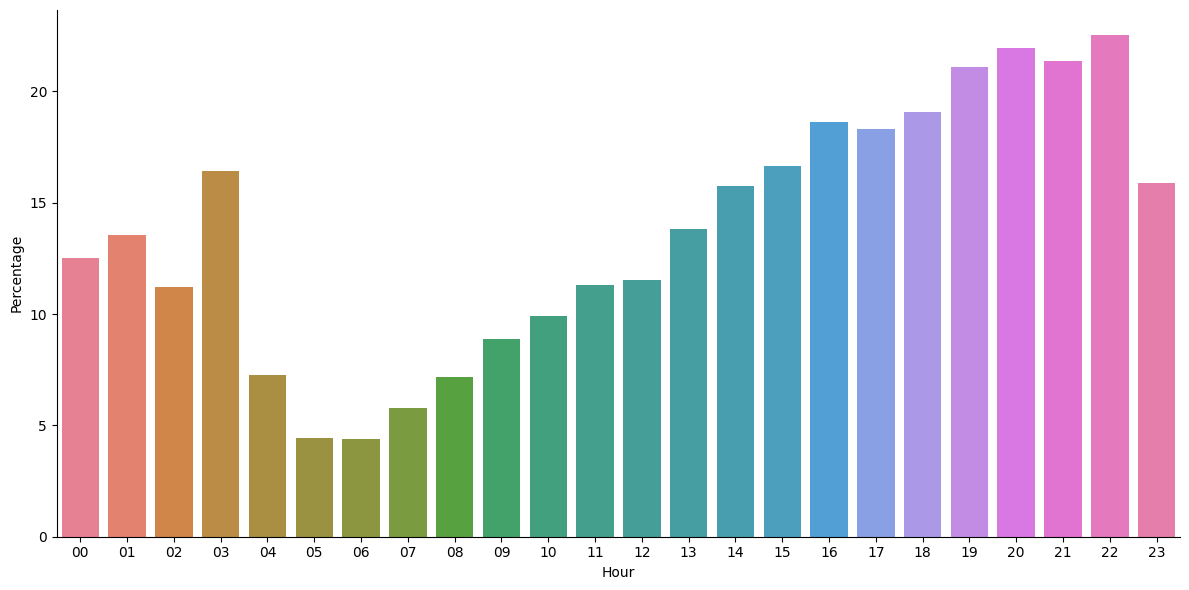

In [61]:
Percentage7 = Percentage7.sort_values(by='Hour', ascending=True)
sb.catplot(x='Hour', y='Percentage', kind='bar', data=Percentage7, height=6, aspect=2, hue="Hour", legend=False)

In [62]:
print(Percentage7["Percentage"].describe())

count    24.000000
mean     13.724247
std       5.651608
min       4.383679
25%       9.645171
50%      13.673303
75%      18.375354
max      22.528062
Name: Percentage, dtype: float64


### Observations

<div class="alert alert-block alert-info">  
Although the frequency graph plotted for CRSDepTime may suggest amount of traffic flow, flights during non-peak hours (00 - 05) also have a significant chance of delay.<br/> This suggests that there are other factors affecting departure delay as well.
</div>

## **Summary**

<div class="alert alert-block alert-success">  

</div>
